In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import plotCategoricalPerformance
from efn_util import get_flowdict, get_flowstring, get_ef_dimensionalities

exp_fam = 'inv_wishart';

datadir = '/Users/sbittner/Documents/efn/results/Fig3/';
if (exp_fam == 'dirichlet'):
    Ds = [3, 4, 6, 8, 10, 15];
    give_inverse_hint = False;
elif (exp_fam == 'inv_wishart'):
    Ds = [4, 9, 16, 25, 36, 49];
    give_inverse_hint = False;
elif (exp_fam == 'normal'):
    Ds = [2, 4, 6, 8, 10];
    give_inverse_hint = True;
num_Ds = len(Ds);

K = 100;
M = 1000;
rs = 0;

train_R2s = np.zeros((num_Ds, K));
train_KLs = np.zeros((num_Ds, K));

for i in range(num_Ds):
    D = Ds[i];
    D_Z, ncons, num_param_net_inputs = get_ef_dimensionalities(exp_fam, D, give_inverse_hint);
    planar_flows = D_Z;
    flow_dict = get_flowdict(0, planar_flows, 0, 0);
    flowstring = get_flowstring(flow_dict);
    
    L = int(np.ceil(np.sqrt(D_Z)));
    try:
        if (give_inverse_hint):
            fname = datadir + 'EFN_%s_stochaticEta_giveInv_D=%d_K=%d_M=%d_flow=%s_L=%d_rs=%d/results.npz' % (exp_fam, D, K, M, flowstring, L, rs);
        else:
            fname = datadir + 'EFN_%s_stochaticEta_D=%d_K=%d_M=%d_flow=%s_L=%d_rs=%d/results.npz' % (exp_fam, D, K, M, flowstring, L, rs);
        X = np.load(fname);
    except:
        pass
    train_R2s[i,:] = X['train_R2s'][-1,:];
    train_KLs[i,:] = X['train_KLs'][-1,:];
    
print(np.mean(train_R2s, 1));
print(np.mean(train_KLs, 1));


[-1.04002054e+08 -8.84605524e+03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
[3656.21825344  187.79362074    0.            0.            0.
    0.        ]


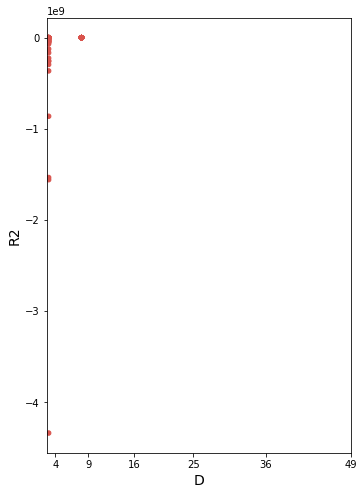

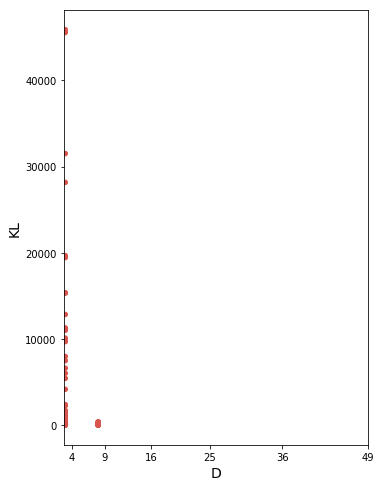

In [10]:
fontsize = 14;
dotsize = 20;
x = np.array(Ds);
legendstrs = [];
fig = plt.figure(figsize=(12, 8));
ax = fig.add_subplot(1,2,1);
plotCategoricalPerformance(x, np.expand_dims(train_R2s, 0), legendstrs, plottype='scatter', dotsize=dotsize);
ax.set_xticks(x);
ax.set_xticklabels(Ds);
plt.xlabel('D', fontsize=fontsize);
plt.ylabel('R2', fontsize=fontsize);
plt.show();

fontsize = 14;
dotsize = 20;
x = np.array(Ds);
legendstrs = [];
fig = plt.figure(figsize=(12, 8));
ax = fig.add_subplot(1,2,1);
plotCategoricalPerformance(x, np.expand_dims(train_KLs, 0), legendstrs, plottype='scatter', dotsize=dotsize);
ax.set_xticks(x);
ax.set_xticklabels(Ds);
plt.xlabel('D', fontsize=fontsize);
plt.ylabel('KL', fontsize=fontsize);
plt.show();